<a href="https://colab.research.google.com/github/mkirby1995/NLP/blob/master/DS_421_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 2 Assignment 1*

Analyze a corpus of text using text visualization of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Stemming
- Lemmatization
- Custom stopword removal
- Using frequency based stopwrod removal

You are free to use any dataset you are interested in. Kaggle is a great place to start. Feel free to sample the data if the dataset is too large to hanlde in memory. 

## Import

In [1]:
!pip install squarify

In [0]:
"""
Import Statements
"""

# Base
from collections import Counter
import re

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")

In [3]:
data = 'https://raw.githubusercontent.com/mkirby1995/NLP/master/State_of_Unions.json'
df = pd.read_json(data)
df = df.sort_values(by = ['year'])

df.head()

,president,year,content
125,Washington,1790,
127,Washington,1791,Fellow-Citizens of the Senate and House of Rep...
138,Washington,1792,Fellow-Citizens of the Senate and House of Rep...
136,Washington,1793,Fellow-Citizens of the Senate and House of Rep...
163,Washington,1794,Fellow-Citizens of the Senate and House of Rep...


In [0]:
df['content'] = df['content'].str.strip('\n')
df['content'] = df['content'].str.strip('\n\n')



---



## Tokenize (manual)

In [0]:
def tokenize(text):
  sample = re.sub(r'[^a-zA-Z ^0-9]', '', text)
  tokens = sample.lower().split()
  return tokens

In [0]:
df['tokens'] = df['content'].apply(tokenize)

In [7]:
df['tokens'].tail()

66     [mr, speaker, mr, vice, president, members, of...
64     [mr, speaker, mr, vice, president, members, of...
79     [mr, speaker, mr, vice, president, members, of...
67     [thank, you, very, much, mr, speaker, mr, vice...
149    [mr, speaker, mr, vice, president, members, of...
Name: tokens, dtype: object

### Analyze Tokens

In [8]:
word_counts = Counter()

df['tokens'].apply(lambda x: word_counts.update(x))

word_counts.most_common(10)

[('the', 122318),
 ('of', 84846),
 ('to', 53162),
 ('and', 51211),
 ('in', 32786),
 ('a', 23880),
 ('that', 18637),
 ('for', 16165),
 ('be', 15968),
 ('is', 14893)]

In [0]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [10]:
wc = count(df['tokens'])

wc.head(40)


,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
609,the,227,122318,1.0,0.076122,0.076122,0.995614
340,of,227,84846,2.0,0.052802,0.128924,0.995614
764,to,227,53162,3.0,0.033084,0.162008,0.995614
339,and,227,51211,4.0,0.031870,0.193878,0.995614
177,in,227,32786,5.0,0.020404,0.214282,0.995614
416,a,227,23880,6.0,0.014861,0.229143,0.995614
44,that,227,18637,7.0,0.011598,0.240741,0.995614
321,for,227,16165,8.0,0.010060,0.250801,0.995614
818,be,227,15968,9.0,0.009937,0.260739,0.995614
675,is,227,14893,10.0,0.009268,0.270007,0.995614


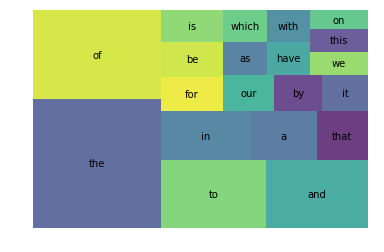

In [11]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()



---



## Tokenize (spacy)

In [12]:
tokenizer = Tokenizer(nlp.vocab)

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['content'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

df['tokens'].head()

125                                                   []
127    [Fellow-Citizens, of, the, Senate, and, House,...
138    [Fellow-Citizens, of, the, Senate, and, House,...
136    [Fellow-Citizens, of, the, Senate, and, House,...
163    [Fellow-Citizens, of, the, Senate, and, House,...
Name: tokens, dtype: object

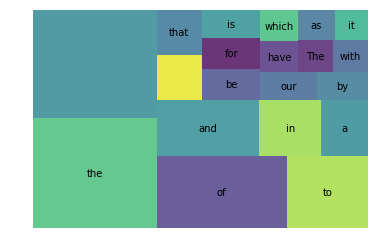

In [13]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [14]:
wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
615,the,227,137568,1.0,0.071619,0.071619,0.995614
458,\n,227,135374,2.0,0.070477,0.142095,0.995614
345,of,227,95751,3.0,0.049849,0.191944,0.995614
779,to,227,59303,4.0,0.030874,0.222817,0.995614
343,and,227,58152,5.0,0.030274,0.253092,0.995614
179,in,227,35144,6.0,0.018296,0.271388,0.995614
418,a,227,26490,7.0,0.013791,0.285179,0.995614
653,\n\n,227,20904,8.0,0.010883,0.296062,0.995614
44,that,227,20616,9.0,0.010733,0.306794,0.995614
833,be,227,18383,10.0,0.009570,0.316365,0.995614


### Stop Words

In [0]:
tokens = []

""" Update those tokens """
for doc in tokenizer.pipe(df['content'], batch_size=500):
    
    doc_tokens = []

    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
            
df['tokens'] = tokens

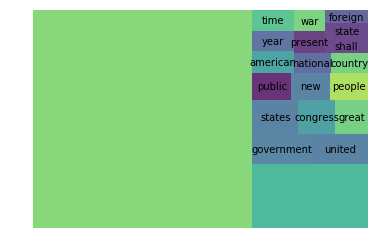

In [16]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Extending Stopwords

In [0]:
STOP_WORDS = nlp.Defaults.stop_words.union(['\n', 'government', 'congress', 'united', 'states', "great", '\n\n', 'the', 'i'])

In [18]:
'government' in STOP_WORDS

True

In [0]:
tokens = []

for doc in tokenizer.pipe(df['content'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [20]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

wc_top20['word']

534            the
482              i
13          united
749         states
458     government
362             it
911       congress
3263            we
156             in
721         public
390            new
1803        people
2263      american
266           year
141           time
991           this
607       national
352        country
740        present
761            war
Name: word, dtype: object

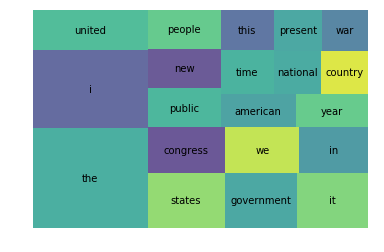

In [21]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()



---



## Stemming

In [0]:
ps = PorterStemmer()

In [0]:
df['stems'] = df['tokens']

In [24]:
for _ in range(len(df['tokens'])):
  stems = []
  for word in df['tokens'][_]:
    stems.append(ps.stem(word))
  df['stems'][_] = stems

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [25]:
wc = count(df['stems'])

wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
497,the,227,11580,1.0,0.013396,0.013396,0.995614
444,i,227,9097,2.0,0.010524,0.023920,0.995614
615,state,227,6271,3.0,0.007254,0.031174,0.995614
243,unit,225,4823,4.0,0.005579,0.036753,0.986842
174,govern,214,4814,5.0,0.005569,0.042322,0.938596


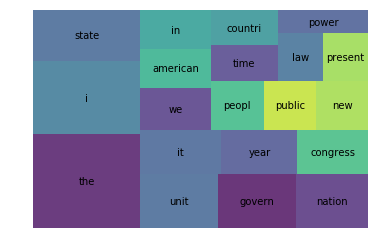

In [26]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()



---



## Lemmatization

In [0]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [0]:
#df['lemmas'] = df['content'].apply(get_lemmas)

In [0]:
#wc = count(df['lemmas'])
#wc_top20 = wc[wc['rank'] <= 20]

#squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
#plt.axis('off')
#plt.show()



---



## Stretch Goals

* Write a web scraper that can scrape "Data Scientist" job listings from indeed.com.
* Look ahead to some of the topics from later this week:
 - Part of Speech Tagging
 - Named Entity Recognition
 - Document Classification
* Try a different visualization techniques
* Automate the process of retriving job listings. ;)

In [0]:
import requests
import bs4
from bs4 import BeautifulSoup
import time

In [0]:
URL = "https://www.indeed.com/jobs?q=data+scientist&l=Texas"
#conducting a request of the stated URL above:
page = requests.get(URL)
#specifying a desired format of “page” using the html parser - this allows python to read the various components of the page, rather than treating it as one long string.
soup = BeautifulSoup(page.text, "html.parser")
#printing soup in a more structured tree format that makes for easier reading
print(soup.prettify())

In [32]:
def extract_job_title_from_result(soup): 
  jobs = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
      jobs.append(a["title"])
  return(jobs)

extract_job_title_from_result(soup)

['Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Principal Data Scientist',
 'Medicare Supplement Overpayment Data Mining Programmer',
 'Data Scientist',
 'Jr. Data Scientist',
 'Data Scientist',
 'Data Scientist',
 'Data Scientist I',
 'Associate Data Scientist',
 'Junior Data Scientist',
 'Data Scientist',
 '2019 FALL Internship - SPORTS SCIENCE & DATA ANALYTICS',
 'Jr Data Scientist',
 'Transformation Data Scientist',
 'Data Scientist I',
 'Data Scientist']

In [33]:
def extract_company_from_result(soup): 
  companies = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    company = div.find_all(name="span", attrs={"class":"company"})
    if len(company) > 0:
      for b in company:
        companies.append(b.text.strip())
    else:
      sec_try = div.find_all(name="span", attrs={"class":"result-link-source"})
      for span in sec_try:
        companies.append(span.text.strip())
  return(companies)
 
extract_company_from_result(soup)

['Indeed Prime',
 'Verizon',
 'eBay Inc.',
 'Cognira, LLC',
 'Asset Protection Unit, Inc.',
 'Burnett Specialists',
 'Software Concept',
 'Apple',
 'Imperial Oil',
 'Noble Energy, Inc.',
 'Sysco',
 'Conestoga Energy',
 'Smart Apartment Data',
 'FC DALLAS, Major League Soccer & Toyota Stadium',
 'HMS',
 'DELL',
 'Christus Health',
 'NT Concepts']

In [34]:
def extract_location_from_result(soup): 
  locations = []
  spans = soup.findAll("span", attrs={"class": "location"})
  for span in spans:
    locations.append(span.text)
  return(locations)

extract_location_from_result(soup)

['Carrollton, TX',
 'Austin, TX 78758 (North Austin area)',
 'Houston, TX 77060 (Far North area)',
 'Houston, TX 77067',
 'Houston, TX 77077 (West Houston area)',
 'Southlake, TX 76092',
 'Austin, TX',
 'Frisco, TX',
 'Irving, TX',
 'Texas']

In [35]:
def extract_salary_from_result(soup): 
  salaries = []
  for div in soup.find_all(name="div", attrs={"class":"salarySnippet"}):
    #print(div.find(name="span", attrs = {"class":"salary"}).text)
    #print("\n\n")
    try:
      salaries.append(div.find(name="span", attrs = {"class":"salary"}).text)
    except:
      salaries.append("Nothing_found")
  return(salaries)

extract_salary_from_result(soup)

[]

In [36]:
def extract_summary_from_result(soup): 
  summaries = []
  try:
    spans = soup.findAll("div", attrs={"class": "summary"})
  except:
    salaries.append("Nothing_found")
  for span in spans:
    summaries.append(span.text)
  return(summaries)

extract_summary_from_result(soup)

['\n            Get matched – Companies apply to you with opportunities that reflect your role, location and salary specifications. How Indeed Prime Works....',
 '\n            Experience with SQL and either Python, R or SAS. The primary responsibilities of this position are centered on the examination, understanding and presentation...',
 '\n            Decision Science contains both data scientists and software engineers responsible for creating and implementing state of the art machine learning algorithms for...',
 '\n            Understands and leverages data mining, machine learning, data modeling, and statistical modeling techniques. Keep up to date with technical as well as industry...',
 '\n            Machine Learning. Candidates selected will be subject to a pre-employment background investigation (drug test, credit check, reference verification) and skills...',
 '\n            Apply data analysis algorithms (data mining, statistics, machine learning, natural language process

In [0]:
def extract(soup):
  
  jobs = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
      jobs.append(a["title"])
      
  companies = []
  for div in soup.find_all(name="div", attrs={"class":"row"}):
    company = div.find_all(name="span", attrs={"class":"company"})
    if len(company) > 0:
      for b in company:
        companies.append(b.text.strip())
    else:
      sec_try = div.find_all(name="span", attrs={"class":"result-link-source"})
      for span in sec_try:
        companies.append(span.text.strip())
        
  locations = []
  spans = soup.findAll("div", attrs={"class": "recJobLoc"})
  for span in spans:
    locations.append(span.text)
  
  salaries = []
  for _ in range(len(jobs)):
    divs = soup.find_all(name="div", attrs={"class":"salarySnippet"})
    try:
      salaries.append(divs[_].find(name="span", attrs = {"class":"salary"}).text)
    except:
      salaries.append("Nothing_found")
  
  summaries = []
  try:
    spans = soup.findAll("div", attrs={"class": "summary"})
  except:
    salaries.append("Nothing_found")
  for span in spans:
    summaries.append(span.text)
    
  return {'job_title':jobs,
          'company':companies,
          'location':locations,
          'salary':salaries,
          'summary':summaries}

In [0]:
max_results_per_city = 200
city_set = ["Dallas", "Fort+Worth", "Irving", "Carolton", "Plano", "Arlington", "Grapevine", "McKinney", "Allen", 'Frisco']

In [39]:
jobs = []
companies = []
locations = []
summaries = []

for city in city_set:
  for start in range(0, max_results_per_city, 10):
    page = requests.get("https://www.indeed.com/jobs?q=data+scientist&l=" + str(city) + "&start=" + str(start))
    time.sleep(1)
    soup = BeautifulSoup(page.text, "lxml")    
      
    for div in soup.find_all(name="div", attrs={"class":"row"}):
      for a in div.find_all(name="a", attrs={"data-tn-element":"jobTitle"}):
        jobs.append(a["title"])      

    for div in soup.find_all(name="div", attrs={"class":"row"}):
      company = div.find_all(name="span", attrs={"class":"company"})
      if len(company) > 0:
        for b in company:
          companies.append(b.text.strip())
      else:
        sec_try = div.find_all(name="span", attrs={"class":"result-link-source"})
        for span in sec_try:
          companies.append(span.text.strip())        

    divs = soup.findAll("div", attrs={"class": "recJobLoc"})
    for div in divs:
      #print(str(div))
      if len(str(div)) > 0:
        locations.append(str(div))
      else:
        locations.append('none')
    
    spans = soup.findAll("div", attrs={"class": "summary"})
    for span in spans:
      if len(span.text) > 0:
        summaries.append(span.text)
      else:
        summaries.append('none')

print(len(jobs),
  len(companies),
  len(locations),
  len(summaries))

2916 2916 2916 2916


In [0]:
 jobs = pd.DataFrame({'job_title':jobs,
          'company':companies,
          'location':locations,
          'summary':summaries})  



In [41]:
jobs.head()

,job_title,company,location,summary
0,Data Scientist,Verizon,"<div class=""recJobLoc"" data-rc-loc=""Irving, TX...","\n As a Data Scientist, you will be..."
1,Data Scientist/Statistician (Statistical Model...,S5 Stratos,"<div class=""recJobLoc"" data-rc-loc=""Dallas, TX...",\n S5's R&D team is responsible for...
2,Senior Data Scientist,Verizon,"<div class=""recJobLoc"" data-rc-loc=""Irving, TX...",\n Experience in managing projects ...
3,Medicare Insurance Agent – Industry-best comp ...,ASSURANCE Independent Agents,"<div class=""recJobLoc"" data-rc-loc=""Dallas, TX...","\n Our team of engineers, data scie..."
4,Senior Data Scientist,ITL USA,"<div class=""recJobLoc"" data-rc-loc=""Richardson...",\n In the role of Senior Data Scien...


In [0]:
jobs['summary'] = jobs['summary'].str.strip()

In [43]:
tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(jobs['summary'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)
    
jobs['tokens'] = tokens

jobs['tokens'].head()

0    [As, a, Data, Scientist,, you, will, be, a, ke...
1    [S5's, R&D, team, is, responsible, for, creati...
2    [Experience, in, managing, projects, working, ...
3    [Our, team, of, engineers,, data, scientists,,...
4    [In, the, role, of, Senior, Data, Scientist, w...
Name: tokens, dtype: object

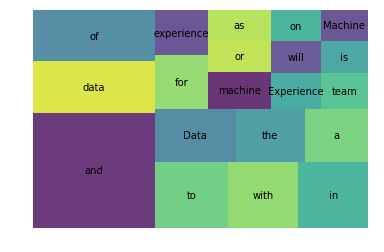

In [44]:
wc = count(jobs['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
tokens = []

""" Update those tokens """
for doc in tokenizer.pipe(jobs['summary'], batch_size=500):
    
    doc_tokens = []

    for token in doc:
        if (token.is_stop == False) and (token.is_punct == False):
            doc_tokens.append(token.text.lower())
            
    tokens.append(doc_tokens)
            
jobs['tokens'] = tokens

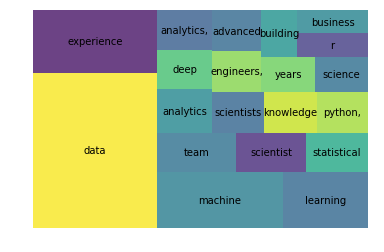

In [46]:
wc = count(jobs['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
nlp.vocab["science"].is_stop = True
nlp.vocab["scientist"].is_stop = True
nlp.vocab["scientists"].is_stop = True
nlp.vocab["team"].is_stop = True
nlp.vocab["data"].is_stop = True
nlp.vocab["scientists,"].is_stop = True
nlp.vocab["experience"].is_stop = True
nlp.vocab["\n"].is_stop = True

STOP_WORDS = nlp.Defaults.stop_words

In [0]:
STOP_WORDS

In [0]:
STOP_WORDS = nlp.Defaults.stop_words.union(['\n', 'science', 'scientist', 'scientists', 'scientists,', "data", 'team', 'experience', 'advanced'])

In [0]:
OTHER_WORDS = set(['\n', 'science', 'scientist', 'scientists', 'scientists,', "data", 'team', 'experience', 'advanced', '\n\n'])

In [0]:
tokens = []

for doc in tokenizer.pipe(jobs['summary'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        if token.text not in STOP_WORDS and token.text not in OTHER_WORDS:
            doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
jobs['tokens'] = tokens

In [52]:
wc = count(jobs['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

wc_top20

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
8,data,777,1019,1.0,0.025029,0.025029,0.266461
20,machine,847,909,2.0,0.022328,0.047357,0.290466
27,learning,565,619,3.0,0.015204,0.062561,0.193759
37,experience,389,442,4.0,0.010857,0.073418,0.133402
55,scientist,303,318,5.0,0.007811,0.081229,0.103909
192,statistical,316,318,6.0,0.007811,0.089040,0.108368
110,analytics,277,311,7.0,0.007639,0.096679,0.094993
16,deep,280,285,8.0,0.007000,0.103680,0.096022
35,"analytics,",200,280,9.0,0.006878,0.110557,0.068587
71,knowledge,262,278,10.0,0.006828,0.117386,0.089849


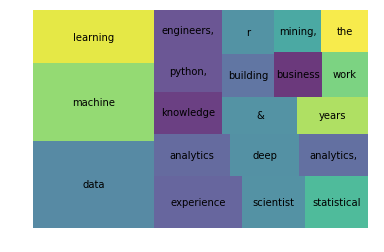

In [53]:
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
jobs['summary'].str.strip()

In [55]:
jobs.columns

Index(['job_title', 'company', 'location', 'summary', 'tokens'], dtype='object')

In [56]:
jobs['company'].value_counts()

Verizon                                   255
ITL USA                                   173
Christus Health                           148
S5 Stratos                                118
Deloitte                                   91
NT Concepts                                85
JP Morgan Chase                            83
s•com                                      78
ASSURANCE Independent Agents               76
UT Southwestern Medical Center             74
KPMG                                       68
Capital One                                55
Bank of America                            43
Roth Technical Specialties Inc             33
Amazon Web Services, Inc.                  32
USAA                                       31
Burns & McDonnell                          27
Epsilon                                    24
LOCKHEED MARTIN CORPORATION                23
J.C. Penney Corporation, Inc.              22
HMS                                        21
Blue Owl                          

In [0]:
locs = jobs['location'].astype(str).str.replace('[+,\-,(,),\ ]', '')

locs = locs.str.lstrip('<divclass="recJobLoc"datarcloc="')

locs = locs.str.rstrip("fed\"style=\"display:none\"></div>")

locs = locs.astype(str).apply(lambda x: x[:-28])

locs = locs.str.rstrip('"id')

jobs['location'] = locs

In [58]:
jobs['location'].value_counts()

DallasTX                 816
IrvingTX                 612
PlanoTX                  440
FortWorthTX              307
SanFranciscoCA           203
RichardsonTX             102
AddisonTX                 77
ArlingtonTX               68
wisvilleTX                41
CarrolltonTX              28
SouthlakeTX               24
SanBrunoCA                23
SouthSanFranciscoCA       21
SanFranciscoBayAreaCA     21
CoppellTX                 19
GrandPrairieTX            18
MenloParkCA               16
SanMateoCA                16
DallasFortWorthTX         13
Texas                      9
McKinneyTX                 8
OaklandCA                  4
FlowerMoundTX              4
HurstTX                    4
EmeryvilleCA               3
RedwoodCityCA              3
FosterCityCA               3
FarmersBranchTX            3
RedwoodShoresCA            2
SanCarlosCA                2
BerkeleyCA                 2
FriscoTX                   1
BurlingameCA               1
DentonTX                   1
SanRafaelCA   

In [0]:
cali = jobs['location'].where(jobs['location'] == 'SanFranciscoCA').dropna()
cali.index
jobs = jobs.drop(labels=cali.index, axis = 0)

In [60]:
jobs['location'].value_counts()

DallasTX                 816
IrvingTX                 612
PlanoTX                  440
FortWorthTX              307
RichardsonTX             102
AddisonTX                 77
ArlingtonTX               68
wisvilleTX                41
CarrolltonTX              28
SouthlakeTX               24
SanBrunoCA                23
SouthSanFranciscoCA       21
SanFranciscoBayAreaCA     21
CoppellTX                 19
GrandPrairieTX            18
MenloParkCA               16
SanMateoCA                16
DallasFortWorthTX         13
Texas                      9
McKinneyTX                 8
OaklandCA                  4
FlowerMoundTX              4
HurstTX                    4
EmeryvilleCA               3
FosterCityCA               3
FarmersBranchTX            3
RedwoodCityCA              3
RedwoodShoresCA            2
SanCarlosCA                2
BerkeleyCA                 2
FriscoTX                   1
BurlingameCA               1
DentonTX                   1
SanRafaelCA                1
Name: location

In [61]:
jobs['job_title'].value_counts()

Data Scientist                                                                                                      488
Data Scientist I                                                                                                    144
Senior Data Scientist                                                                                               138
Lead Data Scientist                                                                                                 120
Data Scientist/Statistician (Statistical Modeling)                                                                  118
Medicare Insurance Agent – Industry-best comp plan, popular carriers                                                 76
Machine Learning Engineer                                                                                            58
Senior Population Science Data Manager                                                                               38
Sr. Data Science Engineer               

In [0]:
machine_learning = jobs.where(jobs['job_title'] == 'Machine Learning Engineer').dropna()
dallas_ml = machine_learning.where(machine_learning['location'] == 'DallasTX').dropna()

In [63]:
dallas_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 140 to 2566
Data columns (total 5 columns):
job_title    15 non-null object
company      15 non-null object
location     15 non-null object
summary      15 non-null object
tokens       15 non-null object
dtypes: object(5)
memory usage: 720.0+ bytes


In [64]:
machine_learning['company'].value_counts()

Verizon                          14
Kinetix Trading Solutions Inc     8
Novo Labs, Inc.                   7
Okaya inc                         7
Bank of America                   6
Event Dynamic                     5
Capital One                       4
Tiger Analytics                   4
Dialexa                           3
Name: company, dtype: int64